In [31]:
import xarray as xr
xr.set_options(keep_attrs=True)
import cf_xarray
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import polars as pl
import pprint
import os
import sys
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [10]:
dlem_dir = '/Volumes/valencig@bc/DLEM/'
comp_dir = 'ClimateDataComparison/'
bias_dir = comp_dir + 'Bias/'

In [26]:
def get_file(var, model, decade):
    decade_files =  glob(comp_dir + model + f'/*{decade}s.bin')
    return [f for f in decade_files if var in f][0]

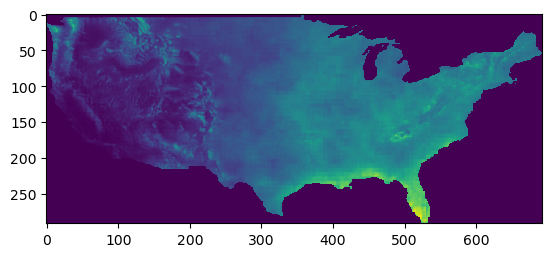

In [35]:
plt.imshow(np.fromfile(get_file('pr', 'DLEMStat/DLEM', 1970), dtype=np.float32).reshape([292, 693]), vmin=0)

In [12]:
variables = {
    'dswrf': 'linear', 
    'pr': 'linear', 
    'tavg': 'delta', 
    'Tmin': 'delta', 
    'Tmax': 'delta'
}
print(f'Directories containing bias correction factors will be created in `{bias_dir}`')
for var, approach in tqdm(variables.items(), desc='Processing DLEM inputs', file=sys.stdout):
    var_dir = bias_dir + var + '/'
    if not os.path.exists(var_dir):
        os.makedirs(var_dir)
    for decade in [1970, 1980, 1990, 2000]:
        cesm2 = np.fromfile(get_file(var, 'CESM2Stat/CESM2', decade), dtype=np.float32).reshape([292, 693])
        dlem = np.fromfile(get_file(var, 'DLEMStat/DLEM', decade), dtype=np.float32).reshape([292, 693])
    
    
    

Directories containing bias correction factors will be created in `ClimateDataComparison/Bias/`
Processing DLEM inputs: 100%|██████████| 5/5 [00:00<00:00, 5400.86it/s]
